In [30]:
#https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist

In [31]:
import pathlib

path=str(pathlib.Path().resolve())+"/data/"

In [32]:
import math
import os
import numpy as np
import cv2 as cv
import random
import librosa

def get_data(path,sr):
    audios = []  # Lista para audios
    audiosRate = []  # Lista para audiosRate
    values = []  # Lista para las etiquetas
    print(path)
    for audio in os.listdir(path):
        samples, sample_rate = librosa.load(path+"/"+audio, sr=None, mono=False)
        audios.append(np.array(transform_sample(samples,sr,sample_rate)))
        audiosRate.append(sample_rate)
        values.append(path.split("/")[-1])
    
    return np.array(audios),np.array(audiosRate),np.array(values) 

def transform_sample(sample,sr,sample_rate):
    samples=librosa.to_mono(sample)
    sample_trunc = seconds(1000,librosa.resample(samples,orig_sr=sample_rate,target_sr=sr),sr)
    sample_shift = desplazamiento(0.1,sample_trunc)
    return noise(50,sample_shift)

def seconds(x,sampl,sr):
    sig_len = sampl.shape[0]
    max_len = (sr//1000) * x

    if sig_len >= max_len: # truncar
      samples_trunc = sampl[:max_len]
    else: # expandir con ceros
      z = np.zeros(max_len - sig_len)
      samples_trunc = np.concatenate((sampl,z))
    return samples_trunc

def desplazamiento(shift_limit,sample):
    sig_len = sample.shape[0]
    shift_len = int(shift_limit * sig_len)
    return np.roll(sample, shift_len)

def noise(SNR,sample):
    RMS_s = math.sqrt(np.mean(sample**2)) # rms
    RMS_n = math.sqrt(RMS_s**2/(pow(10, SNR/10))) # rms deseado del ruido
    noise = np.random.normal(0, RMS_n, sample.shape[0]) # normal media 0 y desviación std RMS_n
    return sample + noise

In [33]:
from concurrent.futures import ThreadPoolExecutor

dirs = os.listdir(path)
threadList=[]
audios,values,rates=[],[],[]
with ThreadPoolExecutor() as executor:
    sr = 22050
    for dir in dirs:
        if dir.endswith(".txt"):continue
        threadList.append(executor.submit(get_data,path+dir,sr))

    for t in threadList:
        r=t.result()
        audios.append(r[0])
        rates.append(r[1])
        values.append(r[2])

audios = np.array(audios)
rates = np.array(rates)
values = np.array(values)

C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/01
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/02
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/03
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/04
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/05
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Sonido\Audio_Mnist/data/06
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico

In [34]:
#from matplotlib import pyplot as plt
#
#
#plt.figure(figsize=(14,5))
#plt.plot(audios[0][0])

In [35]:
#audios

In [54]:
audios=audios.reshape(-1, audios.shape[-1])
rates=rates.flatten()
values=values.flatten()

In [55]:
from IPython.display import Audio
Audio(audios[0],rates[0])

OSError: [WinError 6] Controlador no válido

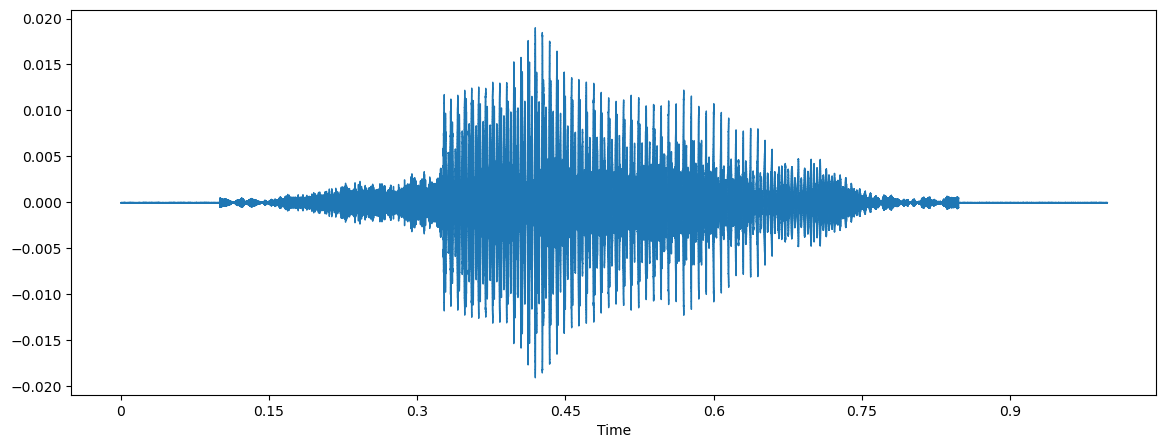

In [36]:
from matplotlib import pyplot as plt


plt.figure(figsize=(14,5))
librosa.display.waveshow(audios[0][0], sr=sr)

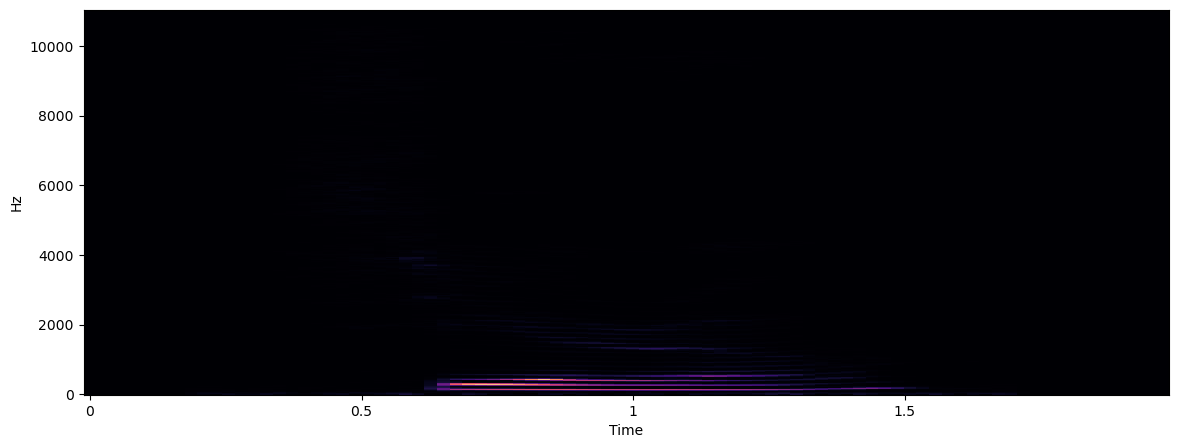

In [37]:
sgram = librosa.stft(audios[0][0], n_fft=1024, hop_length=None)
sgram, _ = librosa.magphase(sgram)
plt.figure(figsize=(14,5))
librosa.display.specshow(sgram,sr=sr,x_axis="time",y_axis="hz")

In [39]:
audios2.shape

(30000, 22000)